In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [29]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

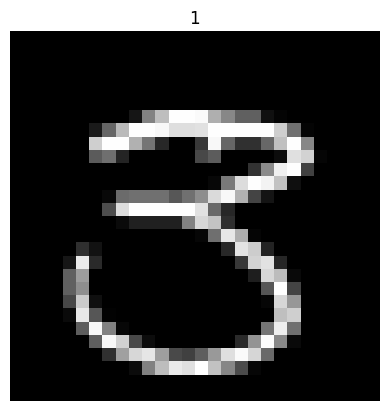

In [31]:
# plot some samples
img = X_train.iloc[7].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [32]:
# 0-255 -> 0-1
# Normalize
X_train = X_train / 255.0

In [33]:
X_train = X_train.values.reshape(-1,28,28,1)

print('X_train shape: ', X_train.shape)

X_train shape:  (42000, 28, 28, 1)


In [35]:
# one-hot encoding
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=10)

In [37]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

datagen.fit(X_train)

In [ ]:
train_data = datagen.flow(X_train,Y_train, batch_size=batch_size)

# CNN Model

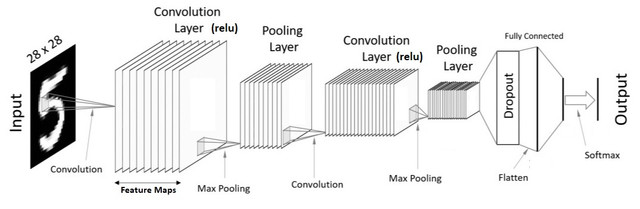

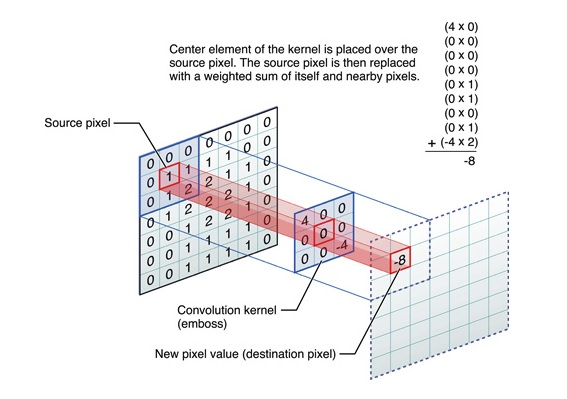
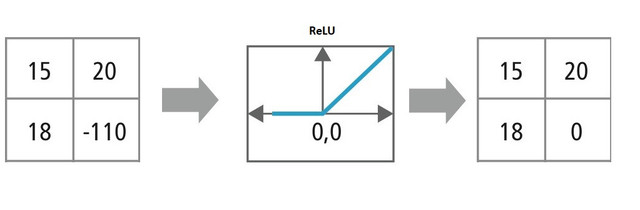


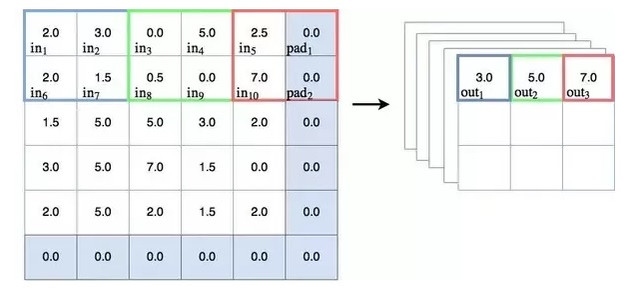

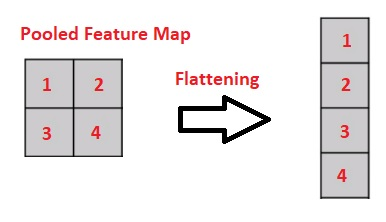


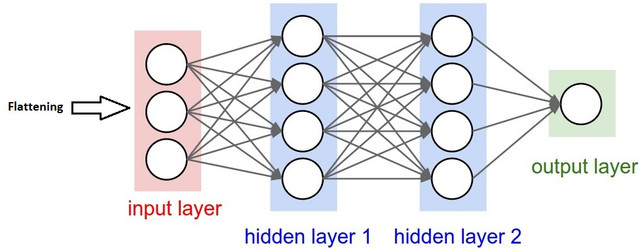

## Create the model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = Sequential([
    # First convolutional block
    Conv2D(filters=8, kernel_size=(5, 5), padding='Same', 
           activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2, 2)),
#     Dropout(0.25),
    
    # Second convolutional block
    Conv2D(filters=16, kernel_size=(3, 3), padding='Same', 
           activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
#     Dropout(0.25),
    
    # Fully connected layers
    Flatten(),
    Dense(256, activation="relu"),
#     Dropout(0.5),
    Dense(10, activation="softmax")
])


## Compile the model

In [61]:
# truth: 3
# gt: [0, 0, 0, 1, 0, 0, 0,.... 0]    
# prediction: [0.1, 0, .5, .3, 0, 0,...  0, 0]
# # calculate log loss


# # Gradient Descent

In [62]:
from keras.optimizers import Adam
optimizer = Adam()
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Train the model

In [63]:
epochs = 10
batch_size = 250

In [66]:
# Fit the model
history = model.fit(train_data,
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7511 - loss: 0.9176 - val_accuracy: 0.9405 - val_loss: 0.2033
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9600 - loss: 0.1379 - val_accuracy: 0.9467 - val_loss: 0.1898
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9552 - loss: 0.1477 - val_accuracy: 0.9617 - val_loss: 0.1326
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9640 - loss: 0.0962 - val_accuracy: 0.9610 - val_loss: 0.1295
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9750 - loss: 0.0836 - val_accuracy: 0.9745 - val_loss: 0.0797
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.0805 - val_accuracy: 0.9767 - val_loss: 0.0811
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9828 - loss: 0.0586 - val_accuracy: 0.9807 - val_loss: 0.0742
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.0908 - val_accuracy

# Plot Results

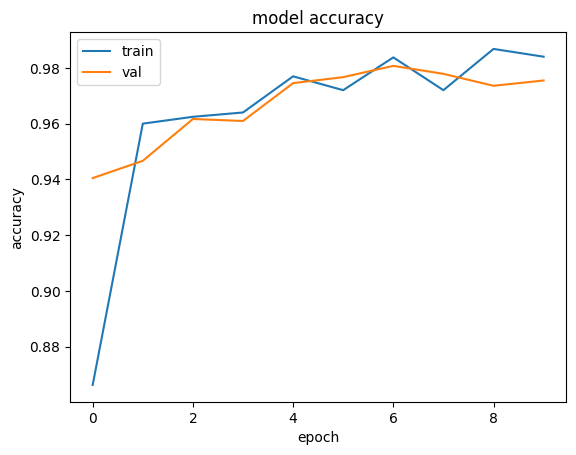

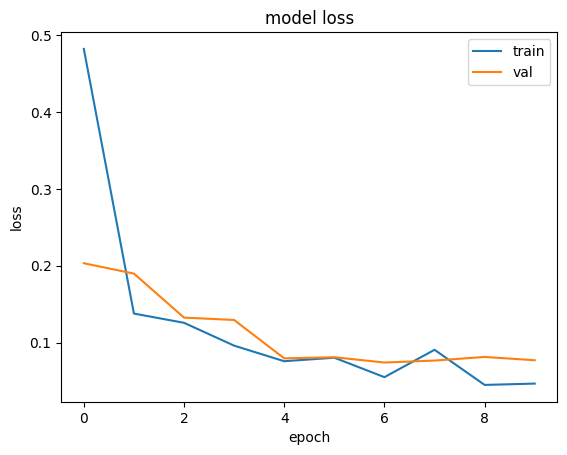

In [68]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Results

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


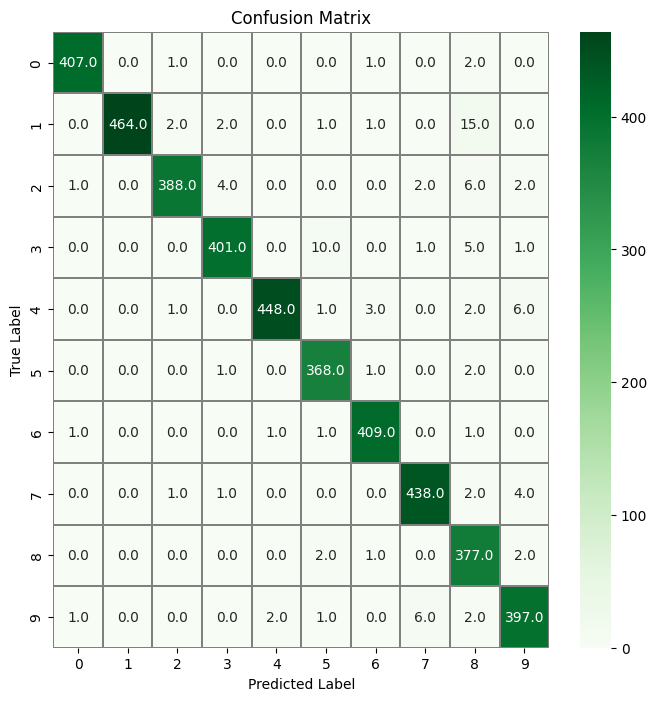

Accuracy: 0.9754761904761905


In [72]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute accuracy
accuracy = accuracy_score(Y_true, Y_pred_classes)
print("Accuracy:", accuracy)
